In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv') # https://en.wikipedia.org/wiki/Iris_flower_data_set 

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

<AxesSubplot: xlabel='species', ylabel='count'>

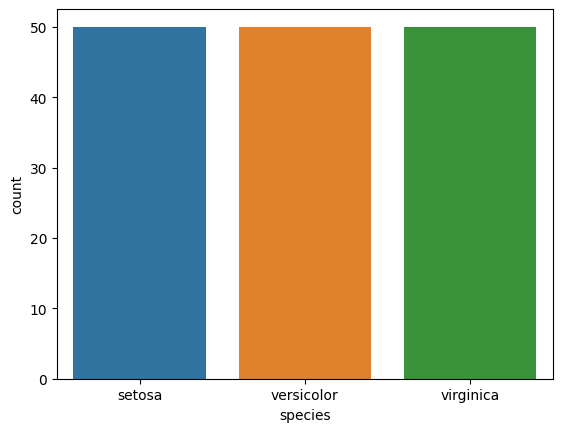

In [7]:
sns.countplot(data=df , x = "species")

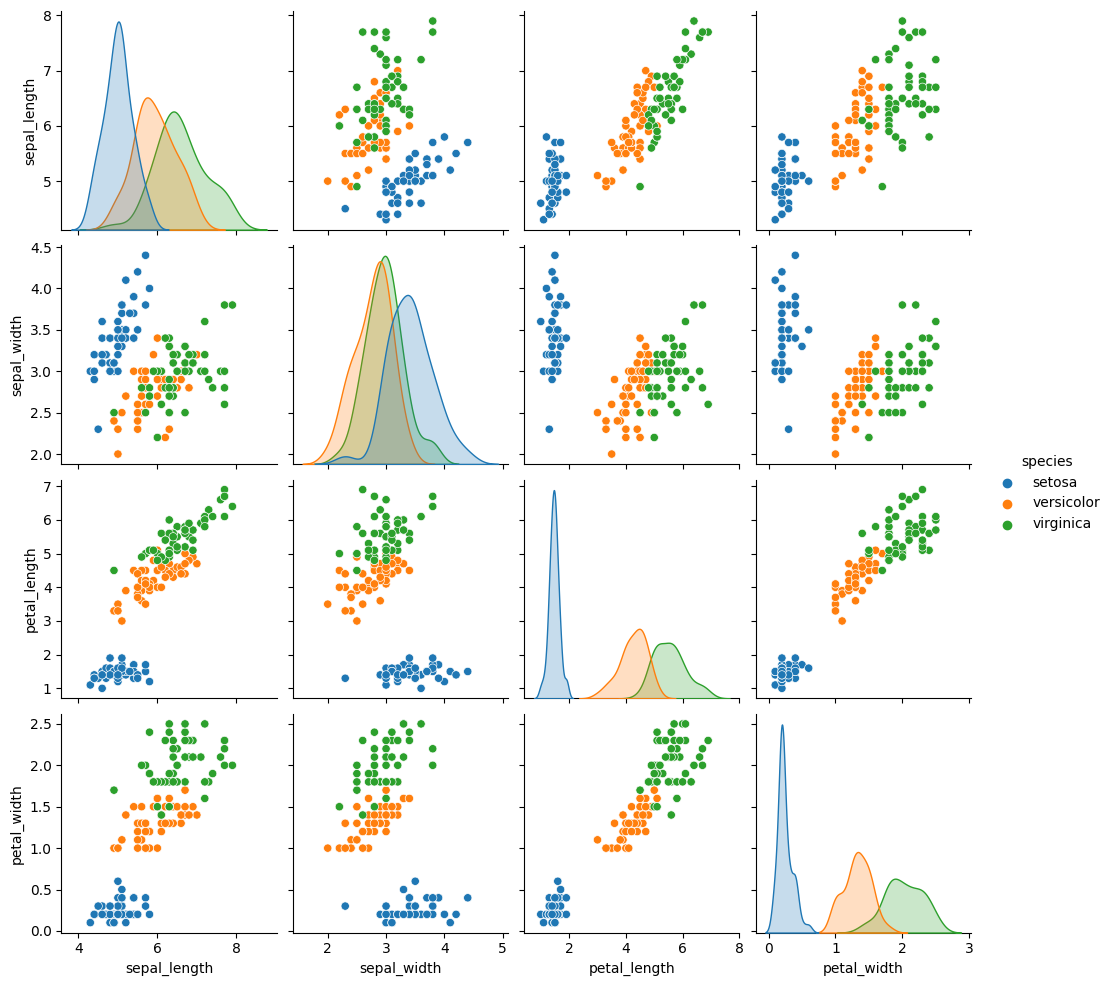

In [8]:
sns.pairplot(data=df , hue="species")

C:\Users\engam\AppData\Local\Temp\ipykernel_22196\3865923713.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, cmap="viridis")


<AxesSubplot: >

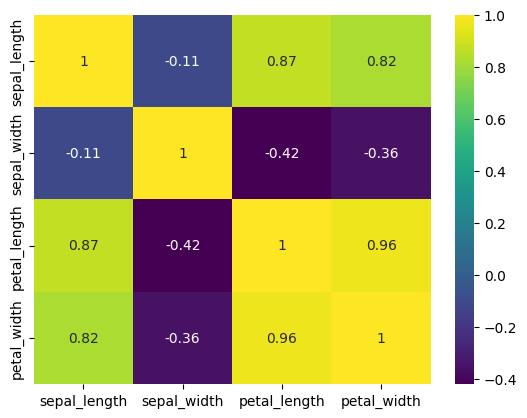

In [11]:
sns.heatmap(df.corr(),annot=True, cmap="viridis")

In [12]:
classes = df['species'].unique()
classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

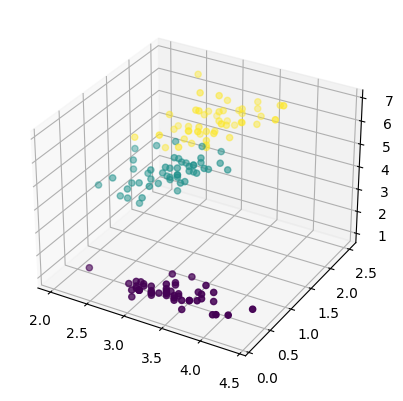

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

In [14]:
# Let's build our model

X = df.drop("species",axis=1)
y = df['species']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [16]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [17]:
# Train model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [ ]:
# From documentation

# our hyper parameter = penalty ['elasticnet', 'l1', 'l2'] , C , l1_ratio
# solver = 'saga' , max_iter = 5000

In [18]:
log_model = LogisticRegression(solver = 'saga',max_iter = 5000,multi_class ='ovr') # Our base model

In [19]:
penalty= ['elasticnet', 'l1', 'l2']
C = np.logspace(0,4,10)
l1_ratio = np.linspace(0,1,20)
param_grid = {'C':C, "penalty": penalty,"l1_ratio":l1_ratio}

In [20]:
grid_model = GridSearchCV(log_model,param_grid=param_grid)

In [21]:
grid_model.fit(scaled_X_train,y_train)

c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165:

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['elasticnet', 'l1', 'l2']})

In [22]:
grid_model.best_params_

{'C': 7.742636826811269, 'l1_ratio': 0.0, 'penalty': 'l1'}

# Calculate Metrics

In [26]:
from sklearn.metrics import (accuracy_score,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             classification_report,
                             precision_score,
                             recall_score,
                             PrecisionRecallDisplay,
                             RocCurveDisplay)

In [27]:
y_pred = grid_model.predict(scaled_X_test)

In [28]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [29]:
model_accuracy_scr = accuracy_score(y_true=y_test,y_pred=y_pred)
print(f"Model Accuracy score = {model_accuracy_scr}")

Model Accuracy score = 0.9736842105263158


In [30]:
conf_matrix = confusion_matrix(y_true=y_test,y_pred=y_pred)
print(f"Model has confusion Matrix as\n  {conf_matrix}")

Model has confusion Matrix as
  [[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]


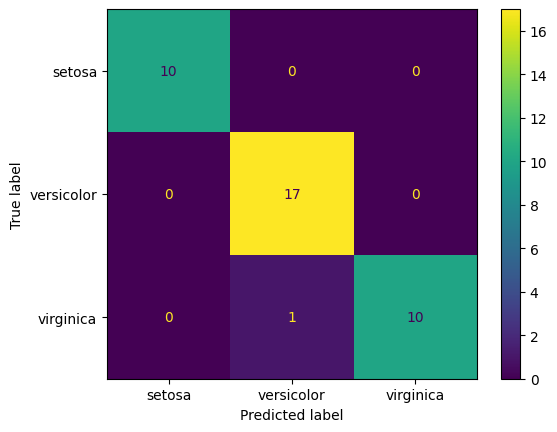

In [31]:
plot_conf_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test)

In [32]:
len(y_test)

38

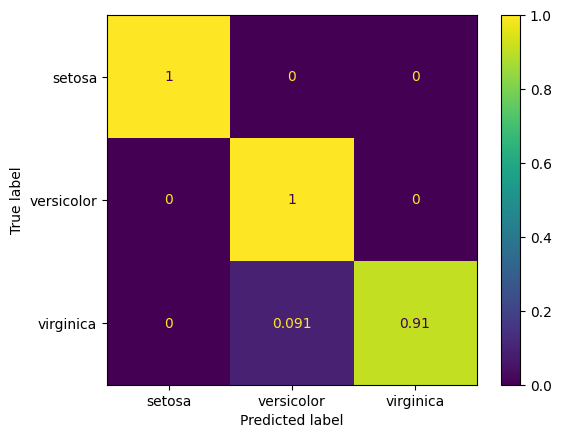

In [33]:
plot_conf_matrix = ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test,normalize="true")

In [34]:
classification_report_str = classification_report(y_true=y_test,y_pred=y_pred)
print(classification_report_str)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
help(grid_model.decision_function)

Help on method decision_function in module sklearn.model_selection._search:

decision_function(X) method of sklearn.model_selection._search.GridSearchCV instance
    Call decision_function on the estimator with the best found parameters.
    
    Only available if ``refit=True`` and the underlying estimator supports
    ``decision_function``.
    
    Parameters
    ----------
    X : indexable, length n_samples
        Must fulfill the input assumptions of the
        underlying estimator.
    
    Returns
    -------
    y_score : ndarray of shape (n_samples,) or (n_samples, n_classes)                 or (n_samples, n_classes * (n_classes-1) / 2)
        Result of the decision function for `X` based on the estimator with
        the best found parameters.



# Build ROC for Multi-class

In [36]:
from sklearn.metrics import roc_curve, auc

In [37]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

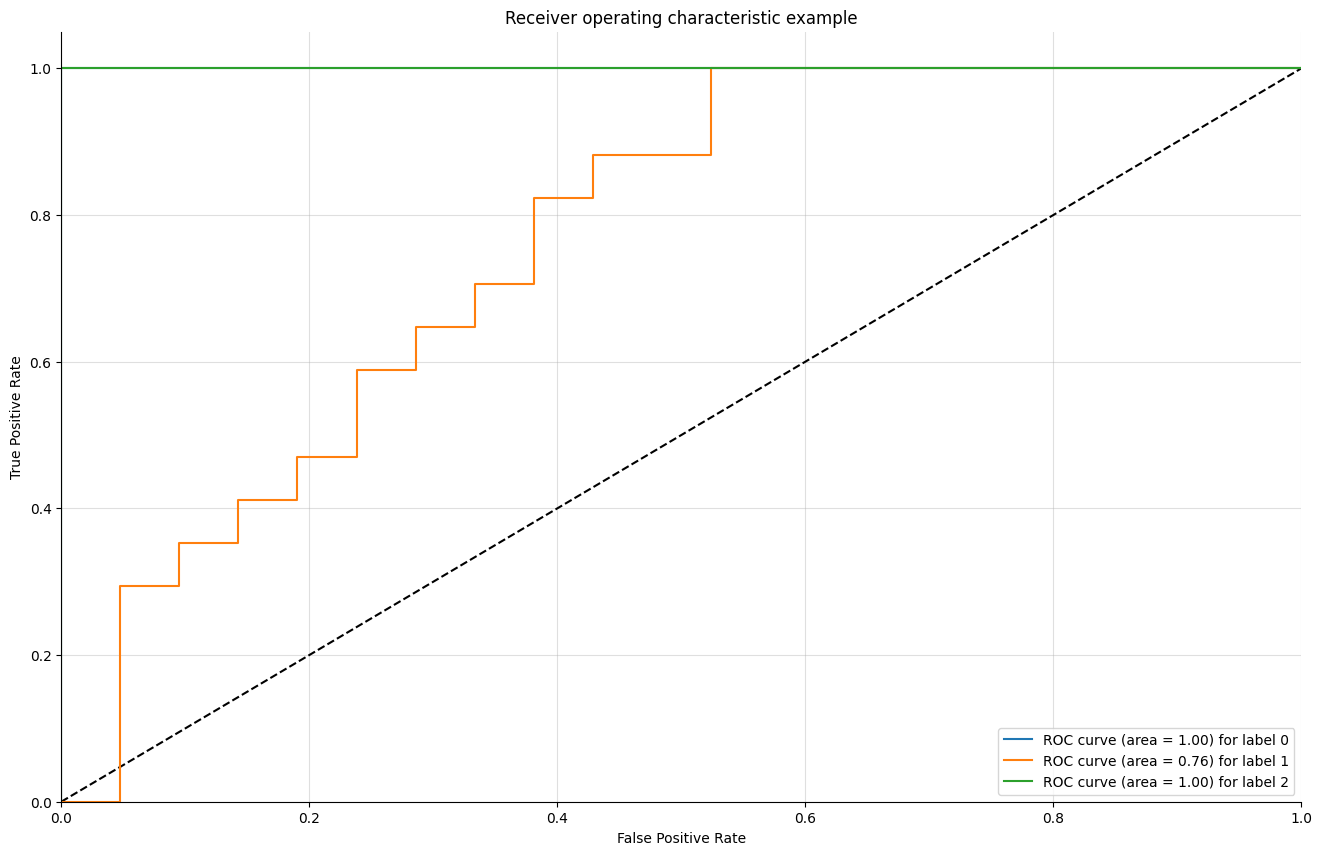

In [38]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

In [39]:
classes

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
# Build final model 

Lor_final_model = grid_model.fit(scaler.fit_transform(X),y)

c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\engam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1165:

In [41]:
Lor_final_model.best_params_

{'C': 21.544346900318832, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [42]:
accuracy_score(Lor_final_model.predict(scaler.fit_transform(X)),y)

0.9666666666666667

In [43]:
from joblib import dump, load
dump(Lor_final_model,"IRIS_model_240208.joblib")

['IRIS_model_240208.joblib']